# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

In [3]:
print(X_train.shape)

(49000, 32, 32, 3)


## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [4]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
regularization_strengths = [5e2, 5e3, 5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
num_iters = 2500 # tmp for development
for rate in learning_rates:
    for strength in regularization_strengths:
        mySvm = LinearSVM()
        mySvm.train(X_train_feats, y_train, learning_rate=rate, reg=strength,
                      num_iters=num_iters, verbose=True)
        y_train_pred = mySvm.predict(X_train_feats)
        training_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = mySvm.predict(X_val_feats)
        validation_accuracy = np.mean(y_val == y_val_pred)
        results[(rate, strength)] = (training_accuracy,validation_accuracy)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = mySvm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 2500: loss 9.761693
iteration 100 / 2500: loss 9.751579
iteration 200 / 2500: loss 9.757708
iteration 300 / 2500: loss 9.767196
iteration 400 / 2500: loss 9.759911
iteration 500 / 2500: loss 9.767023
iteration 600 / 2500: loss 9.770343
iteration 700 / 2500: loss 9.756061
iteration 800 / 2500: loss 9.755806
iteration 900 / 2500: loss 9.758766
iteration 1000 / 2500: loss 9.762486
iteration 1100 / 2500: loss 9.768146
iteration 1200 / 2500: loss 9.759896
iteration 1300 / 2500: loss 9.770678
iteration 1400 / 2500: loss 9.759041
iteration 1500 / 2500: loss 9.748595
iteration 1600 / 2500: loss 9.762822
iteration 1700 / 2500: loss 9.757975
iteration 1800 / 2500: loss 9.754313
iteration 1900 / 2500: loss 9.753009
iteration 2000 / 2500: loss 9.751641
iteration 2100 / 2500: loss 9.757024
iteration 2200 / 2500: loss 9.753275
iteration 2300 / 2500: loss 9.749764
iteration 2400 / 2500: loss 9.754004
iteration 0 / 2500: loss 16.554248
iteration 100 / 2500: loss 16.543943
iteration 200 /

iteration 2300 / 2500: loss 8.999959
iteration 2400 / 2500: loss 8.999964
iteration 0 / 2500: loss 7645.847099
iteration 100 / 2500: loss 9.000002
iteration 200 / 2500: loss 8.999997
iteration 300 / 2500: loss 8.999996
iteration 400 / 2500: loss 8.999997
iteration 500 / 2500: loss 8.999997
iteration 600 / 2500: loss 8.999996
iteration 700 / 2500: loss 8.999997
iteration 800 / 2500: loss 8.999997
iteration 900 / 2500: loss 8.999997
iteration 1000 / 2500: loss 8.999996
iteration 1100 / 2500: loss 8.999996
iteration 1200 / 2500: loss 8.999997
iteration 1300 / 2500: loss 8.999997
iteration 1400 / 2500: loss 8.999996
iteration 1500 / 2500: loss 8.999997
iteration 1600 / 2500: loss 8.999997
iteration 1700 / 2500: loss 8.999996
iteration 1800 / 2500: loss 8.999996
iteration 1900 / 2500: loss 8.999996
iteration 2000 / 2500: loss 8.999997
iteration 2100 / 2500: loss 8.999997
iteration 2200 / 2500: loss 8.999997
iteration 2300 / 2500: loss 8.999997
iteration 2400 / 2500: loss 8.999998
iteration 

iteration 2200 / 2500: loss 8.999713
iteration 2300 / 2500: loss 8.999709
iteration 2400 / 2500: loss 8.999643
iteration 0 / 2500: loss 799.792335
iteration 100 / 2500: loss 8.999991
iteration 200 / 2500: loss 8.999999
iteration 300 / 2500: loss 9.000000
iteration 400 / 2500: loss 9.000008
iteration 500 / 2500: loss 8.999999
iteration 600 / 2500: loss 8.999996
iteration 700 / 2500: loss 9.000006
iteration 800 / 2500: loss 9.000001
iteration 900 / 2500: loss 8.999995
iteration 1000 / 2500: loss 9.000002
iteration 1100 / 2500: loss 8.999991
iteration 1200 / 2500: loss 8.999997
iteration 1300 / 2500: loss 8.999996
iteration 1400 / 2500: loss 8.999998
iteration 1500 / 2500: loss 9.000008
iteration 1600 / 2500: loss 9.000002
iteration 1700 / 2500: loss 8.999994
iteration 1800 / 2500: loss 9.000001
iteration 1900 / 2500: loss 9.000000
iteration 2000 / 2500: loss 9.000009
iteration 2100 / 2500: loss 8.999998
iteration 2200 / 2500: loss 9.000006
iteration 2300 / 2500: loss 8.999991
iteration 2

/home/reut/cs231n_assignment1/cs231n/classifiers/linear_svm.py:86: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
/home/reut/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/reut/cs231n_assignment1/cs231n/classifiers/linear_svm.py:86: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)
/home/reut/cs231n_assignment1/cs231n/classifiers/linear_svm.py:106: RuntimeWarning: overflow encountered in multiply
  dW += 2*reg*W
/home/reut/cs231n_assignment1/cs231n/classifiers/linear_svm.py:84: RuntimeWarning: invalid value encountered in greater
  loss = np.sum(margin[margin>0])
/home/reut/cs231n_assignment1/cs231n/classifiers/linear_svm.py:102: RuntimeWarning: invalid value encountered in greater
  mask[margin > 0] = 1
/home/reut/cs231n_assignment1/cs231n/classifiers/linear_classifier.py:79: RuntimeWarning: invalid va

iteration 200 / 2500: loss inf
iteration 300 / 2500: loss inf
iteration 400 / 2500: loss nan
iteration 500 / 2500: loss nan
iteration 600 / 2500: loss nan
iteration 700 / 2500: loss nan
iteration 800 / 2500: loss nan
iteration 900 / 2500: loss nan
iteration 1000 / 2500: loss nan
iteration 1100 / 2500: loss nan
iteration 1200 / 2500: loss nan
iteration 1300 / 2500: loss nan
iteration 1400 / 2500: loss nan
iteration 1500 / 2500: loss nan
iteration 1600 / 2500: loss nan
iteration 1700 / 2500: loss nan
iteration 1800 / 2500: loss nan
iteration 1900 / 2500: loss nan
iteration 2000 / 2500: loss nan
iteration 2100 / 2500: loss nan
iteration 2200 / 2500: loss nan
iteration 2300 / 2500: loss nan
iteration 2400 / 2500: loss nan
iteration 0 / 2500: loss 9.758278
iteration 100 / 2500: loss 9.074668
iteration 200 / 2500: loss 8.976624
iteration 300 / 2500: loss 8.975605
iteration 400 / 2500: loss 8.974990
iteration 500 / 2500: loss 8.960620
iteration 600 / 2500: loss 8.955450
iteration 700 / 2500: 

In [6]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.419


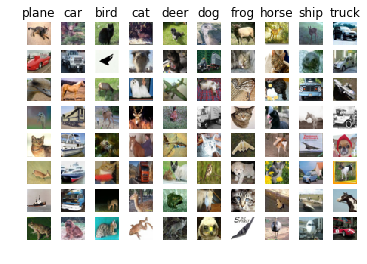

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
print(X_train_feats.shape)

(49000, 155)


In [9]:
from cs231n.classifiers.neural_net import TwoLayerNet
import time

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = -1
results = {}

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
rate_decays = [1, 0.95,0.99] #[0.99, 0.95, 0.9, 0.8, 0.7, 0.6]
hidden_sizes = [1500, 1000, 500, 100, 50] # [10, 50, 100, 150, 500]
num_iters = 2500 # tmp for development
max_count = 70

for ind, hidden_size in enumerate(hidden_sizes):
    tic = time.time()
    for count in range(max_count):
        rate = 10**np.random.uniform(-3, 1)
        strength = 10**np.random.uniform(-5, 1)
        for decay in rate_decays:
            myNet = TwoLayerNet(input_dim, hidden_size, num_classes)
            myNet.train(X_train_feats, y_train, X_val_feats, y_val, learning_rate=rate, reg=strength,
                      learning_rate_decay=decay, num_iters=num_iters, verbose=False)
            y_train_pred = myNet.predict(X_train_feats)
            training_accuracy = np.mean(y_train == y_train_pred)
            y_val_pred = myNet.predict(X_val_feats)
            validation_accuracy = np.mean(y_val == y_val_pred)
            results[(hidden_size, rate, strength, decay)] = (training_accuracy,validation_accuracy)
            if validation_accuracy > best_val:
                best_val = validation_accuracy
                best_net = myNet
            print(count,' hs ',hidden_size,' lr ',rate,' reg ',strength,' decay ',decay,' train accuracy: ',training_accuracy,' val accuracy: ',validation_accuracy)
    toc = time.time()
    print('computed in ',( toc - tic),'s')

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

0  hs  1500  lr  0.006922009920220811  reg  3.392601183470151  decay  1  train accuracy:  0.09989795918367347  val accuracy:  0.105
0  hs  1500  lr  0.006922009920220811  reg  3.392601183470151  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
0  hs  1500  lr  0.006922009920220811  reg  3.392601183470151  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
1  hs  1500  lr  1.053724044524556  reg  0.09914420991404721  decay  1  train accuracy:  0.2959591836734694  val accuracy:  0.282
1  hs  1500  lr  1.053724044524556  reg  0.09914420991404721  decay  0.95  train accuracy:  0.2813673469387755  val accuracy:  0.289
1  hs  1500  lr  1.053724044524556  reg  0.09914420991404721  decay  0.99  train accuracy:  0.28183673469387754  val accuracy:  0.265
2  hs  1500  lr  1.593443417330588  reg  0.26798621972061104  decay  1  train accuracy:  0.1676326530612245  val accuracy:  0.161
2  hs  1500  lr  1.593443417330588  reg  0.26798621972061104  decay  0.

/home/reut/cs231n_assignment1/cs231n/classifiers/neural_net.py:101: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(scores[np.arange(N), y]))
/home/reut/cs231n_assignment1/cs231n/classifiers/neural_net.py:98: RuntimeWarning: overflow encountered in subtract
  scores = scores - np.max(scores, axis=1)[:, np.newaxis]  # for numerical stability
/home/reut/cs231n_assignment1/cs231n/classifiers/neural_net.py:98: RuntimeWarning: invalid value encountered in subtract
  scores = scores - np.max(scores, axis=1)[:, np.newaxis]  # for numerical stability
/home/reut/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/reut/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/reut/cs231n_assignment1/cs231n/classifiers/neural_net.py:120: Runtime

7  hs  1500  lr  1.622146978839315  reg  0.7884413049529618  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
7  hs  1500  lr  1.622146978839315  reg  0.7884413049529618  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087


/home/reut/cs231n_assignment1/cs231n/classifiers/neural_net.py:103: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * (np.sum(W1 * W1) + np.sum(W2 * W2))


7  hs  1500  lr  1.622146978839315  reg  0.7884413049529618  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
8  hs  1500  lr  0.4100555764872635  reg  1.9341542391282138  decay  1  train accuracy:  0.10004081632653061  val accuracy:  0.098
8  hs  1500  lr  0.4100555764872635  reg  1.9341542391282138  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
8  hs  1500  lr  0.4100555764872635  reg  1.9341542391282138  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
9  hs  1500  lr  0.10855954724582804  reg  1.643272746226144e-05  decay  1  train accuracy:  0.6160204081632653  val accuracy:  0.573
9  hs  1500  lr  0.10855954724582804  reg  1.643272746226144e-05  decay  0.95  train accuracy:  0.5853877551020408  val accuracy:  0.561
9  hs  1500  lr  0.10855954724582804  reg  1.643272746226144e-05  decay  0.99  train accuracy:  0.6119591836734694  val accuracy:  0.566
10  hs  1500  lr  0.002411290290775852  reg  0.0075003216035

/home/reut/cs231n_assignment1/cs231n/classifiers/neural_net.py:103: RuntimeWarning: overflow encountered in multiply
  loss += reg * (np.sum(W1 * W1) + np.sum(W2 * W2))


22  hs  1500  lr  6.163023593392501  reg  4.262821344855317e-05  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
22  hs  1500  lr  6.163023593392501  reg  4.262821344855317e-05  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
22  hs  1500  lr  6.163023593392501  reg  4.262821344855317e-05  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
23  hs  1500  lr  5.840366494676413  reg  0.2830158076149142  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
23  hs  1500  lr  5.840366494676413  reg  0.2830158076149142  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
23  hs  1500  lr  5.840366494676413  reg  0.2830158076149142  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
24  hs  1500  lr  0.011629809277380842  reg  0.10318498553007052  decay  1  train accuracy:  0.18724489795918367  val accuracy:  0.188
24  hs  1500  lr  0.011629809277380842  reg  0.10318498553

42  hs  1500  lr  0.015705349658884378  reg  1.847439886625753e-05  decay  0.95  train accuracy:  0.3889183673469388  val accuracy:  0.388
42  hs  1500  lr  0.015705349658884378  reg  1.847439886625753e-05  decay  0.99  train accuracy:  0.43659183673469387  val accuracy:  0.418
43  hs  1500  lr  0.007854613128907307  reg  3.6781302903192756  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
43  hs  1500  lr  0.007854613128907307  reg  3.6781302903192756  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
43  hs  1500  lr  0.007854613128907307  reg  3.6781302903192756  decay  0.99  train accuracy:  0.10042857142857142  val accuracy:  0.079
44  hs  1500  lr  0.015642295289609025  reg  0.0008008257668319866  decay  1  train accuracy:  0.4478367346938775  val accuracy:  0.437
44  hs  1500  lr  0.015642295289609025  reg  0.0008008257668319866  decay  0.95  train accuracy:  0.3804489795918367  val accuracy:  0.374
44  hs  1500  lr  0.015642295289609025

62  hs  1500  lr  0.01955411107065619  reg  0.00038499546023702813  decay  0.99  train accuracy:  0.47383673469387755  val accuracy:  0.461
63  hs  1500  lr  0.11721090746507716  reg  6.024918754148546  decay  1  train accuracy:  0.10044897959183674  val accuracy:  0.078
63  hs  1500  lr  0.11721090746507716  reg  6.024918754148546  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
63  hs  1500  lr  0.11721090746507716  reg  6.024918754148546  decay  0.99  train accuracy:  0.10042857142857142  val accuracy:  0.079
64  hs  1500  lr  1.8687386007380535  reg  3.17229775631265e-05  decay  1  train accuracy:  0.8020204081632653  val accuracy:  0.508
64  hs  1500  lr  1.8687386007380535  reg  3.17229775631265e-05  decay  0.95  train accuracy:  0.9021020408163265  val accuracy:  0.562
64  hs  1500  lr  1.8687386007380535  reg  3.17229775631265e-05  decay  0.99  train accuracy:  0.8230816326530612  val accuracy:  0.55
65  hs  1500  lr  6.23771419795609  reg  0.21586047565

13  hs  1000  lr  0.0010098414502212646  reg  0.41553564366788354  decay  1  train accuracy:  0.09973469387755102  val accuracy:  0.113
13  hs  1000  lr  0.0010098414502212646  reg  0.41553564366788354  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
13  hs  1000  lr  0.0010098414502212646  reg  0.41553564366788354  decay  0.99  train accuracy:  0.10044897959183674  val accuracy:  0.078
14  hs  1000  lr  4.9112440362850505  reg  0.004788972641221635  decay  1  train accuracy:  0.10044897959183674  val accuracy:  0.078
14  hs  1000  lr  4.9112440362850505  reg  0.004788972641221635  decay  0.95  train accuracy:  0.09961224489795918  val accuracy:  0.119
14  hs  1000  lr  4.9112440362850505  reg  0.004788972641221635  decay  0.99  train accuracy:  0.09985714285714285  val accuracy:  0.107
15  hs  1000  lr  0.09205172806285476  reg  0.04835277183577006  decay  1  train accuracy:  0.44842857142857145  val accuracy:  0.436
15  hs  1000  lr  0.09205172806285476  reg  

33  hs  1000  lr  0.3172096205781601  reg  8.873762975638792e-05  decay  0.95  train accuracy:  0.7197346938775511  val accuracy:  0.602
33  hs  1000  lr  0.3172096205781601  reg  8.873762975638792e-05  decay  0.99  train accuracy:  0.7434285714285714  val accuracy:  0.592
34  hs  1000  lr  0.00543238045106467  reg  2.2918634297665497  decay  1  train accuracy:  0.09995918367346938  val accuracy:  0.102
34  hs  1000  lr  0.00543238045106467  reg  2.2918634297665497  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
34  hs  1000  lr  0.00543238045106467  reg  2.2918634297665497  decay  0.99  train accuracy:  0.09989795918367347  val accuracy:  0.105
35  hs  1000  lr  0.004808470276207038  reg  0.2991160971156418  decay  1  train accuracy:  0.10042857142857142  val accuracy:  0.079
35  hs  1000  lr  0.004808470276207038  reg  0.2991160971156418  decay  0.95  train accuracy:  0.09973469387755102  val accuracy:  0.113
35  hs  1000  lr  0.004808470276207038  reg  0.299

53  hs  1000  lr  0.11981987171956106  reg  0.5099740929048421  decay  0.99  train accuracy:  0.09985714285714285  val accuracy:  0.107
54  hs  1000  lr  0.48293102972091545  reg  0.01016490003096971  decay  1  train accuracy:  0.5129183673469387  val accuracy:  0.494
54  hs  1000  lr  0.48293102972091545  reg  0.01016490003096971  decay  0.95  train accuracy:  0.5119387755102041  val accuracy:  0.498
54  hs  1000  lr  0.48293102972091545  reg  0.01016490003096971  decay  0.99  train accuracy:  0.5219183673469387  val accuracy:  0.503
55  hs  1000  lr  2.507821118119415  reg  2.188247301799312e-05  decay  1  train accuracy:  0.7584489795918368  val accuracy:  0.532
55  hs  1000  lr  2.507821118119415  reg  2.188247301799312e-05  decay  0.95  train accuracy:  0.8721428571428571  val accuracy:  0.546
55  hs  1000  lr  2.507821118119415  reg  2.188247301799312e-05  decay  0.99  train accuracy:  0.7718979591836734  val accuracy:  0.51
56  hs  1000  lr  0.001063977080135381  reg  0.05999265

4  hs  500  lr  0.9407595497661215  reg  0.0038548224421823298  decay  1  train accuracy:  0.5676530612244898  val accuracy:  0.526
4  hs  500  lr  0.9407595497661215  reg  0.0038548224421823298  decay  0.95  train accuracy:  0.5819387755102041  val accuracy:  0.543
4  hs  500  lr  0.9407595497661215  reg  0.0038548224421823298  decay  0.99  train accuracy:  0.5620816326530612  val accuracy:  0.539
5  hs  500  lr  0.004307843123178778  reg  2.626705125221743e-05  decay  1  train accuracy:  0.16308163265306122  val accuracy:  0.134
5  hs  500  lr  0.004307843123178778  reg  2.626705125221743e-05  decay  0.95  train accuracy:  0.10042857142857142  val accuracy:  0.079
5  hs  500  lr  0.004307843123178778  reg  2.626705125221743e-05  decay  0.99  train accuracy:  0.1893265306122449  val accuracy:  0.229
6  hs  500  lr  0.9501927887269441  reg  0.009148136204611402  decay  1  train accuracy:  0.4625102040816326  val accuracy:  0.458
6  hs  500  lr  0.9501927887269441  reg  0.00914813620461

24  hs  500  lr  2.972239392085604  reg  0.025738605309855396  decay  0.95  train accuracy:  0.4189591836734694  val accuracy:  0.423
24  hs  500  lr  2.972239392085604  reg  0.025738605309855396  decay  0.99  train accuracy:  0.09975510204081632  val accuracy:  0.112
25  hs  500  lr  5.6065560710978  reg  0.9781485754077788  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
25  hs  500  lr  5.6065560710978  reg  0.9781485754077788  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
25  hs  500  lr  5.6065560710978  reg  0.9781485754077788  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
26  hs  500  lr  0.002516172896094573  reg  0.5781519438365467  decay  1  train accuracy:  0.10004081632653061  val accuracy:  0.098
26  hs  500  lr  0.002516172896094573  reg  0.5781519438365467  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
26  hs  500  lr  0.002516172896094573  reg  0.5781519438365467  decay  0

44  hs  500  lr  0.6238008049828077  reg  0.15156391482067094  decay  0.99  train accuracy:  0.23575510204081632  val accuracy:  0.218
45  hs  500  lr  0.7222934971211761  reg  0.020752310660042933  decay  1  train accuracy:  0.46775510204081633  val accuracy:  0.466
45  hs  500  lr  0.7222934971211761  reg  0.020752310660042933  decay  0.95  train accuracy:  0.4669387755102041  val accuracy:  0.463
45  hs  500  lr  0.7222934971211761  reg  0.020752310660042933  decay  0.99  train accuracy:  0.45985714285714285  val accuracy:  0.443
46  hs  500  lr  0.34246996399760904  reg  0.0020837116296155383  decay  1  train accuracy:  0.6376530612244898  val accuracy:  0.592
46  hs  500  lr  0.34246996399760904  reg  0.0020837116296155383  decay  0.95  train accuracy:  0.6418163265306123  val accuracy:  0.602
46  hs  500  lr  0.34246996399760904  reg  0.0020837116296155383  decay  0.99  train accuracy:  0.6393061224489796  val accuracy:  0.588
47  hs  500  lr  0.01603126852596898  reg  4.59706530

65  hs  500  lr  1.3277129168292077  reg  0.21150854562830596  decay  1  train accuracy:  0.18593877551020407  val accuracy:  0.193
65  hs  500  lr  1.3277129168292077  reg  0.21150854562830596  decay  0.95  train accuracy:  0.17204081632653062  val accuracy:  0.198
65  hs  500  lr  1.3277129168292077  reg  0.21150854562830596  decay  0.99  train accuracy:  0.16391836734693876  val accuracy:  0.187
66  hs  500  lr  0.00120465068290059  reg  7.498450733828451e-05  decay  1  train accuracy:  0.10044897959183674  val accuracy:  0.078
66  hs  500  lr  0.00120465068290059  reg  7.498450733828451e-05  decay  0.95  train accuracy:  0.10004081632653061  val accuracy:  0.098
66  hs  500  lr  0.00120465068290059  reg  7.498450733828451e-05  decay  0.99  train accuracy:  0.10171428571428572  val accuracy:  0.099
67  hs  500  lr  8.532998817208616  reg  0.0006533726198501587  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
67  hs  500  lr  8.532998817208616  reg  0.00065337261

15  hs  100  lr  0.9677260216858142  reg  0.09239240433792081  decay  0.95  train accuracy:  0.31416326530612243  val accuracy:  0.298
15  hs  100  lr  0.9677260216858142  reg  0.09239240433792081  decay  0.99  train accuracy:  0.24514285714285713  val accuracy:  0.272
16  hs  100  lr  0.0016050800611224912  reg  0.21584903969847913  decay  1  train accuracy:  0.10044897959183674  val accuracy:  0.078
16  hs  100  lr  0.0016050800611224912  reg  0.21584903969847913  decay  0.95  train accuracy:  0.09995918367346938  val accuracy:  0.102
16  hs  100  lr  0.0016050800611224912  reg  0.21584903969847913  decay  0.99  train accuracy:  0.10042857142857142  val accuracy:  0.079
17  hs  100  lr  5.649015614855718  reg  0.00409761771789801  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
17  hs  100  lr  5.649015614855718  reg  0.00409761771789801  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
17  hs  100  lr  5.649015614855718  reg  0.00409761771

35  hs  100  lr  0.021520069668090575  reg  1.996948072890096e-05  decay  0.99  train accuracy:  0.4618163265306122  val accuracy:  0.448
36  hs  100  lr  0.0011869549531955976  reg  2.6159767691621042e-05  decay  1  train accuracy:  0.10044897959183674  val accuracy:  0.078
36  hs  100  lr  0.0011869549531955976  reg  2.6159767691621042e-05  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
36  hs  100  lr  0.0011869549531955976  reg  2.6159767691621042e-05  decay  0.99  train accuracy:  0.10042857142857142  val accuracy:  0.079
37  hs  100  lr  0.009229861356256917  reg  0.002011442496384156  decay  1  train accuracy:  0.2433265306122449  val accuracy:  0.259
37  hs  100  lr  0.009229861356256917  reg  0.002011442496384156  decay  0.95  train accuracy:  0.2136326530612245  val accuracy:  0.22
37  hs  100  lr  0.009229861356256917  reg  0.002011442496384156  decay  0.99  train accuracy:  0.227  val accuracy:  0.24
38  hs  100  lr  0.025392654563754263  reg  1.008

56  hs  100  lr  0.0017164047275489674  reg  2.3177698699245533e-05  decay  1  train accuracy:  0.09989795918367347  val accuracy:  0.105
56  hs  100  lr  0.0017164047275489674  reg  2.3177698699245533e-05  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
56  hs  100  lr  0.0017164047275489674  reg  2.3177698699245533e-05  decay  0.99  train accuracy:  0.10042857142857142  val accuracy:  0.079
57  hs  100  lr  0.009575525276911375  reg  8.663998020155966e-05  decay  1  train accuracy:  0.2600408163265306  val accuracy:  0.279
57  hs  100  lr  0.009575525276911375  reg  8.663998020155966e-05  decay  0.95  train accuracy:  0.21581632653061225  val accuracy:  0.211
57  hs  100  lr  0.009575525276911375  reg  8.663998020155966e-05  decay  0.99  train accuracy:  0.23822448979591837  val accuracy:  0.253
58  hs  100  lr  0.02762176031827995  reg  1.2052743395791663  decay  1  train accuracy:  0.09975510204081632  val accuracy:  0.112
58  hs  100  lr  0.0276217603182799

6  hs  50  lr  0.00612606053825892  reg  0.040219130937153104  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
6  hs  50  lr  0.00612606053825892  reg  0.040219130937153104  decay  0.99  train accuracy:  0.10044897959183674  val accuracy:  0.078
7  hs  50  lr  0.37081821347521715  reg  0.0002625043238480751  decay  1  train accuracy:  0.612734693877551  val accuracy:  0.561
7  hs  50  lr  0.37081821347521715  reg  0.0002625043238480751  decay  0.95  train accuracy:  0.6132857142857143  val accuracy:  0.556
7  hs  50  lr  0.37081821347521715  reg  0.0002625043238480751  decay  0.99  train accuracy:  0.6086938775510204  val accuracy:  0.562
8  hs  50  lr  0.20226233705868643  reg  1.4522316618382574  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
8  hs  50  lr  0.20226233705868643  reg  1.4522316618382574  decay  0.95  train accuracy:  0.10044897959183674  val accuracy:  0.078
8  hs  50  lr  0.20226233705868643  reg  1.4522316618382574  decay

26  hs  50  lr  0.0016242311579754273  reg  1.1273593659356485e-05  decay  0.99  train accuracy:  0.10004081632653061  val accuracy:  0.098
27  hs  50  lr  0.1771824572885097  reg  5.6610294231839795e-05  decay  1  train accuracy:  0.5986938775510204  val accuracy:  0.544
27  hs  50  lr  0.1771824572885097  reg  5.6610294231839795e-05  decay  0.95  train accuracy:  0.5886122448979592  val accuracy:  0.563
27  hs  50  lr  0.1771824572885097  reg  5.6610294231839795e-05  decay  0.99  train accuracy:  0.5982448979591837  val accuracy:  0.569
28  hs  50  lr  4.8223249367665355  reg  0.003606510966118163  decay  1  train accuracy:  0.09975510204081632  val accuracy:  0.112
28  hs  50  lr  4.8223249367665355  reg  0.003606510966118163  decay  0.95  train accuracy:  0.09985714285714285  val accuracy:  0.107
28  hs  50  lr  4.8223249367665355  reg  0.003606510966118163  decay  0.99  train accuracy:  0.09995918367346938  val accuracy:  0.102
29  hs  50  lr  0.11537418374883007  reg  2.109643419

47  hs  50  lr  0.04718154700868447  reg  2.1214702750030393e-05  decay  0.95  train accuracy:  0.5187755102040816  val accuracy:  0.503
47  hs  50  lr  0.04718154700868447  reg  2.1214702750030393e-05  decay  0.99  train accuracy:  0.5302857142857142  val accuracy:  0.517
48  hs  50  lr  1.8858519172127473  reg  8.748140038335581  decay  1  train accuracy:  0.10026530612244898  val accuracy:  0.087
48  hs  50  lr  1.8858519172127473  reg  8.748140038335581  decay  0.95  train accuracy:  0.10026530612244898  val accuracy:  0.087
48  hs  50  lr  1.8858519172127473  reg  8.748140038335581  decay  0.99  train accuracy:  0.10026530612244898  val accuracy:  0.087
49  hs  50  lr  0.008810567528415804  reg  0.02318826228755936  decay  1  train accuracy:  0.21075510204081632  val accuracy:  0.221
49  hs  50  lr  0.008810567528415804  reg  0.02318826228755936  decay  0.95  train accuracy:  0.16961224489795917  val accuracy:  0.185
49  hs  50  lr  0.008810567528415804  reg  0.02318826228755936  

68  hs  50  lr  0.16215076253454594  reg  0.004159200897941676  decay  1  train accuracy:  0.5607551020408164  val accuracy:  0.547
68  hs  50  lr  0.16215076253454594  reg  0.004159200897941676  decay  0.95  train accuracy:  0.5556734693877551  val accuracy:  0.542
68  hs  50  lr  0.16215076253454594  reg  0.004159200897941676  decay  0.99  train accuracy:  0.5562857142857143  val accuracy:  0.534
69  hs  50  lr  0.014769953785523563  reg  4.411497356110896  decay  1  train accuracy:  0.10042857142857142  val accuracy:  0.079
69  hs  50  lr  0.014769953785523563  reg  4.411497356110896  decay  0.95  train accuracy:  0.10042857142857142  val accuracy:  0.079
69  hs  50  lr  0.014769953785523563  reg  4.411497356110896  decay  0.99  train accuracy:  0.10004081632653061  val accuracy:  0.098
computed in  876.4539384841919 s


In [10]:
print("best_val", best_val)
print(best_net)

best_val 0.611


In [11]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.577


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!